In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from datetime import timedelta

In [2]:
user = pd.read_csv('takehome_users.csv',encoding = 'latin-1')
engage = pd.read_csv('takehome_user_engagement.csv')

In [3]:
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
engage['time_stamp'] = pd.to_datetime(engage['time_stamp'])
engage['date'] = engage['time_stamp'].dt.date
engage = engage.groupby(['date','user_id']).sum().reset_index()

C:\Users\16096\AppData\Local\Temp\ipykernel_29060\2308739072.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  engage = engage.groupby(['date','user_id']).sum().reset_index()


In [6]:
print('There were {} users and {} total logins'.format(
    engage['user_id'].nunique(), len(engage)
))

There were 8823 users and 207917 total logins


In [7]:
engage.head()

,date,user_id,visited
0,2012-05-31,1693,1
1,2012-05-31,3428,1
2,2012-05-31,9899,1
3,2012-05-31,10012,1
4,2012-06-01,1995,1


In [8]:
# Let's define a function to see if a user logged in on 3 seperate days in a 7-day period
def userlogins_in_days(df, days=7, logins=3):
    df = df.drop_duplicates(subset='date').sort_values('date')
    passed_days = df['date'].diff(periods=logins-1)
    return any(passed_days <= timedelta(days=days))

In [9]:
adopted = engage.groupby('user_id').apply(userlogins_in_days)
adopted.name = 'adopted_user'

In [10]:
print('There were {} adopted users out of {} users'.format(
    sum(adopted), len(adopted)))

There were 1656 adopted users out of 8823 users


In [11]:
#Let's turn these two columns into datetime columns 
user['creation_time'] = pd.to_datetime(user['creation_time'])
user['last_session_creation_time'] = pd.to_datetime(user['last_session_creation_time'])

In [12]:
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0


In [13]:
#Most of these columns are not necessary 
user = user.drop(['org_id', 'invited_by_user_id', 'name', 'email' ], axis=1)

In [14]:
#I predict that users that have longer history are more likely to be an adopted user. Let's see if this is the case 
user['history'] = user['last_session_creation_time'] - user['creation_time']
user['history'] = user['history'].dt.days

latest = max(user['creation_time'])
user['account_age'] = latest - user['creation_time']
user['account_age'] = user['account_age'].dt.days

In [15]:
#We won't need these columns anymore
user = user.drop(['creation_time', 'last_session_creation_time'], axis=1)

In [16]:
user.head()

,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,history,account_age
0,1,GUEST_INVITE,1,0,-16183.0,38
1,2,ORG_INVITE,0,0,-16025.0,196
2,3,ORG_INVITE,0,0,-15784.0,437
3,4,GUEST_INVITE,0,0,-15847.0,374
4,5,GUEST_INVITE,0,0,-15723.0,498


In [17]:
adopted

user_id
1        False
2         True
3        False
4        False
5        False
         ...  
11996    False
11997    False
11998    False
11999    False
12000    False
Name: adopted_user, Length: 8823, dtype: bool

In [18]:
# merge user data and "adopted user" variable
user = user.set_index('object_id')
user.index.name = 'user_id'
data = pd.concat([user, adopted], axis=1, join='inner')

In [19]:
data['adopted_user'] = data['adopted_user'].astype(int)

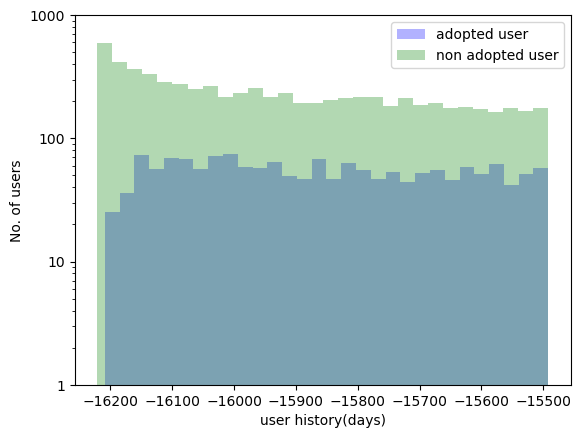

In [24]:
def plot_hist_days(df, col, xlabel):
    _ = plt.hist(df.loc[data['adopted_user']==1, col], 
                 bins=30, alpha=0.3, color='b', label='adopted user')
    _ = plt.hist(df.loc[data['adopted_user']==0, col], 
                 bins=30, alpha=0.3, color='g', label='non adopted user')
    _ = plt.yscale('log')
    _ = plt.legend()
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel('No. of users')
    _ = plt.yticks([1, 10, 100, 1000], ['1', '10', '100', '1000'])
plot_hist_days(data, 'history', 'user history(days)')

Older accounts are definitely more likely to be adopted users. 

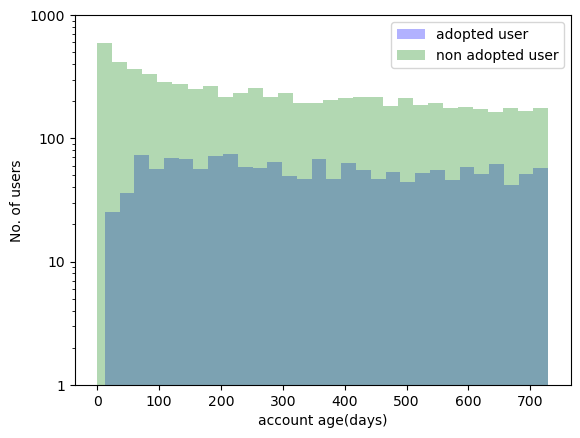

In [25]:
#Now let's see for account age
plot_hist_days(data, 'account_age', 'account age(days)')

This confirms that the chance of becoming an adopted user is lower for newer accounts. 

# Modeling

In [26]:
#First we need to make a dummy variable for 'creation_source'
creation_source = pd.get_dummies(data['creation_source'], drop_first=True)
model_data = pd.concat([data, creation_source], axis=1).drop('creation_source', axis=1)
y = model_data['adopted_user']
X = model_data.drop('adopted_user', axis=1)

In [27]:
#Let's split the data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, stratify=y, random_state=42)

In [31]:
#Let's use random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(random_state=42)
# Let's tune for the number of trees
params = {'n_estimators': [10, 50, 100, 200]}
model = GridSearchCV(clf, params)
model.fit(Xtrain, ytrain)
print('Best parameters were', model.best_params_)
print('Best average precision was', model.best_score_)

Best parameters were {'n_estimators': 10}
Best average precision was 0.7367352647672025


In [32]:
#Let's look at metrics
from sklearn.metrics import classification_report, accuracy_score
model = RandomForestClassifier(
    random_state=42, class_weight='balanced', n_estimators=100
)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print('Accuracy of test set was', accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

Accuracy of test set was 0.6804170444242974
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1792
           1       0.20      0.24      0.22       414

    accuracy                           0.68      2206
   macro avg       0.51      0.51      0.51      2206
weighted avg       0.70      0.68      0.69      2206



In [33]:
#Let's see the most important features
features = pd.Series(model.feature_importances_, index=X.columns)
features = features.sort_values(ascending=False)
print(features)

history                       0.477067
account_age                   0.467439
opted_in_to_mailing_list      0.012680
enabled_for_marketing_drip    0.010772
ORG_INVITE                    0.009725
SIGNUP                        0.008257
SIGNUP_GOOGLE_AUTH            0.007408
PERSONAL_PROJECTS             0.006651
dtype: float64


The most important features are history and account age. So, my recommendation would be to remind users that have older accounts to login. Another recommendation would be based on how the user signed up. Since inviting to an organization and signing up were the ways that led to users having the highest adoption rate, incentivizing those would be helpful. Offering incentives for users that want to work on their personal projects would be a good idea as well.  